In [1]:
import os
import rootpath
import sys
sys.path.append(rootpath.detect())

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from figure_utilities import *

In [4]:
from testsuite.analysis_tools import get_target_dict, get_igd_refpoint_dict
from testsuite.utilities import PROBLEM_CONFIGURATIONS, dominates

In [5]:
format_figures()

In [6]:
D_targets = get_target_dict()
D_rp = get_igd_refpoint_dict()

In [7]:
problem = PROBLEM_CONFIGURATIONS[15]
problem

'wfg6_2obj_6dim'

In [8]:
targets = D_targets[problem]
rp = D_rp[problem]

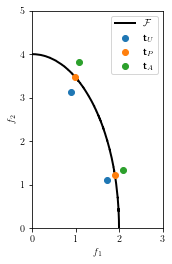

In [9]:
fig = plt.figure(figsize=[(3/5)*4, 4])
fig_ax = fig.gca()

fig_ax.axis("scaled")
fig_ax.set_xlabel(Symbols.function_n(1))
fig_ax.set_ylabel(Symbols.function_n(2))

fig_ax.plot(*rp[np.argsort(rp[:,0])].T, **Styles.line_Pareto_front, label=Symbols.Pareto_front, zorder=1)
fig_ax.scatter(*targets[::3].T, label=Symbols.target+"$_U$", zorder=2)
fig_ax.scatter(*targets[1::3].T, label=Symbols.target+"$_P$", zorder=3)
fig_ax.scatter(*targets[2::3].T, label=Symbols.target+"$_A$", zorder=4)
fig_ax.set_xlim(0, 3)
fig_ax.set_ylim(0, 5) 
fig_ax.legend()
save_fig(fig, filename="fig_target_positions_wfg6_2obj")

In [10]:
targets.shape

(6, 2)

In [11]:
t1 = targets[0]
t1_rp = np.vstack([i for i in rp if dominates(t1, i)])
t1_rp.shape

(356, 2)

In [12]:
t2 = targets[5]
t2_rp = np.vstack([i for i in rp if dominates(i, t2)])
t2_rp.shape

(372, 2)

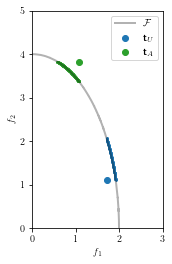

In [13]:
fig_rp = plt.figure(figsize=[(3/5)*4, 4])
fig_rp_ax = fig_rp.gca()

fig_rp_ax.axis("scaled")
fig_rp_ax.set_xlabel(Symbols.function_n(1))
fig_rp_ax.set_ylabel(Symbols.function_n(2))

fig_rp_ax.plot(*rp[np.argsort(rp[:,0])].T, **Styles.line_Pareto_front, label=Symbols.Pareto_front, alpha=0.3)

fig_rp_ax.scatter(*t1, c="C0", label=Symbols.target+"$_U$")
fig_rp_ax.scatter(*t1_rp.T, c="C0", s=2)

fig_rp_ax.scatter(*t2, c="C2", label=Symbols.target+"$_A$")
fig_rp_ax.scatter(*t2_rp.T, c="C2", s=2)

fig_rp_ax.set_xlim(0, 3)
fig_rp_ax.set_ylim(0, 5) 
fig_rp_ax.legend()
save_fig(fig_rp, filename="fig_target_rp_wfg6_2obj")

In [41]:
resolution = 2500
radius = 1.
x_Pareto, y_Pareto = np.array([np.cos(np.linspace(0, np.pi/2, resolution)), np.sin(np.linspace(0, np.pi/2, resolution))])
target_angles = (20/360)*2*np.pi, (65/360)*2*np.pi
targets = np.asarray([[[np.cos(angle)*scale, np.sin(angle)*scale] for scale in [0.9, 1.0, 1.1]] for angle in target_angles])

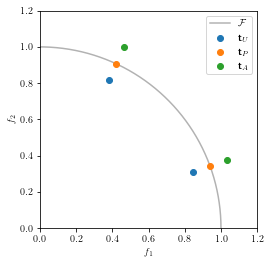

In [60]:
fig = plt.figure(figsize=[4, 4])
fig_ax = fig.gca()

fig_ax.plot(x_Pareto, y_Pareto, c="k", label=Symbols.Pareto_front, alpha=0.3)
fig_ax.scatter(*targets[:, 0].T, c=["C0"], label=Symbols.target+"$_U$", zorder=2)
fig_ax.scatter(*targets[:, 1].T, c=["C1"], label=Symbols.target+"$_P$", zorder=3)
fig_ax.scatter(*targets[:, 2].T, c=["C2"], label=Symbols.target+"$_A$", zorder=4)


fig_ax.axis("scaled")
fig_ax.legend()
fig_ax.set_xlim(0, 1.2)
fig_ax.set_ylim(0, 1.2) 
fig_ax.set_xlabel(Symbols.function_n(1))
fig_ax.set_ylabel(Symbols.function_n(2))
fig_ax.legend()
save_fig(fig, filename="fig_target_positions_circ_2obj")

In [61]:
t1 = targets[0, 0, :]
t2 = targets[1, 2, :]
rp = np.hstack((x_Pareto.reshape(-1, 1), y_Pareto.reshape(-1, 1)))

t1_rp = np.array([i for i in rp if dominates(t1, i)])
t2_rp = np.array([i for i in rp if dominates(i, t2)])

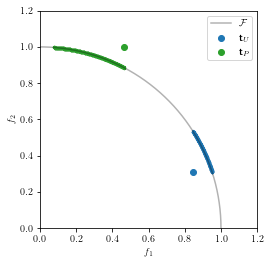

In [62]:
fig = plt.figure(figsize=[4, 4])
fig_ax = fig.gca()

fig_ax.plot(x_Pareto, y_Pareto, c="k", label=Symbols.Pareto_front, alpha=0.3)
fig_ax.scatter(*t1, c=["C0"], label=Symbols.target+"$_U$", zorder=2)
fig_ax.scatter(*t2, c=["C2"], label=Symbols.target+"$_P$", zorder=3)

fig_ax.scatter(*t1_rp.T, c="C0", s=5)
fig_ax.scatter(*t2_rp.T, c="C2", s=5)

fig_ax.axis("scaled")
fig_ax.legend()
fig_ax.set_xlim(0, 1.2)
fig_ax.set_ylim(0, 1.2) 
fig_ax.set_xlabel(Symbols.function_n(1))
fig_ax.set_ylabel(Symbols.function_n(2))
fig_ax.legend()
save_fig(fig, filename="fig_target_rp_circ_2obj")

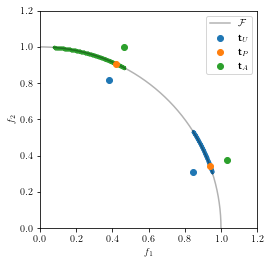

In [63]:
fig = plt.figure(figsize=[4, 4])
fig_ax = fig.gca()

fig_ax.plot(x_Pareto, y_Pareto, c="k", label=Symbols.Pareto_front, alpha=0.3)
fig_ax.scatter(*targets[:, 0].T, c=["C0"], label=Symbols.target+"$_U$", zorder=2)
fig_ax.scatter(*targets[:, 1].T, c=["C1"], label=Symbols.target+"$_P$", zorder=3)
fig_ax.scatter(*targets[:, 2].T, c=["C2"], label=Symbols.target+"$_A$", zorder=4)

fig_ax.scatter(*t1_rp.T, c="C0", s=5)
fig_ax.scatter(*t2_rp.T, c="C2", s=5)

fig_ax.axis("scaled")
fig_ax.legend()
fig_ax.set_xlim(0, 1.2)
fig_ax.set_ylim(0, 1.2) 
fig_ax.set_xlabel(Symbols.function_n(1))
fig_ax.set_ylabel(Symbols.function_n(2))
fig_ax.legend()
save_fig(fig, filename="fig_target_both_circ_2obj")